<b> PHYS 4060 Lab 5 <b>
    <br>
CROSS SPECTRAL ANALYSIS

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal, fft

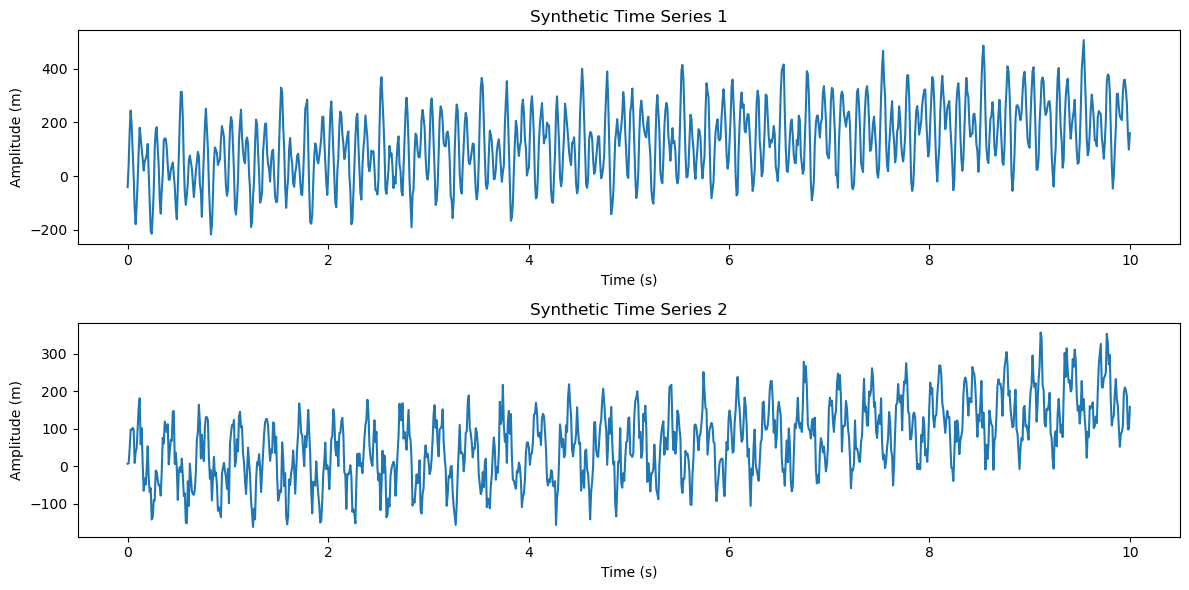

In [197]:
# Set seed for reproducibility
np.random.seed(42)

# Define parameters
n_points = 1000  # Number of data points
t = np.linspace(0, 10, n_points)  # Time vector

# Generate the first synthetic time series
series1 = np.zeros(n_points)
num_sin = 5  # Number of sinusoids

# Lists to store individual sinusoids and their frequencies
sinusoids1 = []
frequencies1 = [1, 2, 5, 8, 12]  # Specific frequencies
amplitudes1 = [10, 25, 57, 86, 125]
phases1 = [np.pi/4, np.pi/2, np.pi, 0, -np.pi/3]

for i in range(num_sin):
    freq = frequencies1[i]  # Use the specific frequencies
    amplitude = amplitudes1[i]  # Amplitude
    phase = phases1[i]  # Phase
    sinusoid = amplitude * np.sin(2 * np.pi * freq * t + phase)
    sinusoids1.append(sinusoid)
    series1 += sinusoid

# Add linear trend
slope = 20
intercept = 25
linear_trend = slope * t + intercept
series1 += linear_trend

# Add random noise
noise_level = 20
noise = np.random.normal(0, noise_level, n_points)
series1 += noise

# Generate the second synthetic time series with similar characteristics
series2 = np.zeros(n_points)
sinusoids2 = []
frequencies2 = [20, 35, 5, 3, 11.9]  # Specific frequencies
amplitudes2 = [10, 25, 10, 86, 62.5]
phases1 = [np.pi/4, np.pi/2, np.pi, 0, -np.pi/3]
for i in range(num_sin):
    freq = frequencies2[i]  # Use the specific frequencies
    amplitude = amplitudes2[i] #amplitude = np.random.uniform(1, 10)  # Amplitude
    phase = phases1[i]  # Phase
    sinusoid = amplitude * np.sin(2 * np.pi * freq * t + phase)
    sinusoids2.append(sinusoid)
    series2 += sinusoid

# Add quadratic trend
quadratic_trend = 2 * t**2 - 0.5 * t + 0.3
series2 += quadratic_trend

# Add random noise
noise2 = np.random.normal(0, noise_level, n_points)
series2 += noise2

# Create a figure with two rows and one column of subplots
plt.figure(figsize=(12, 6))

# Subplot for Synthetic Time Series 1
plt.subplot(2, 1, 1)
plt.title('Synthetic Time Series 1')
plt.plot(t, series1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

# Subplot for Synthetic Time Series 2
plt.subplot(2, 1, 2)
plt.title('Synthetic Time Series 2')
plt.plot(t, series2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

plt.tight_layout()

---

**Computing the PSD Using the Wiener-Khinchin Theorem**

---

In [219]:
# Plotting the Autocovariance function for Series 1

# Calculate Auto-Covariance Function
def autocovariance(series, lag):
    n = len(series)
    autocovar_sum = 0
    mean_series = np.mean(series)
    for t in range(n - lag):
        autocovar_sum += (series[t] - mean_series) * (series[t + lag] - mean_series)
    return autocovar_sum / n
def FourierTransform(autocovariance):
    sampling_frequency = 1 / (t[1] - t[0])
    power_spectrum = np.fft.fft(autocovariance)
    fft_freqs = np.fft.fftfreq(len(power_spectrum), 1/sampling_frequency)
    return power_spectrum, fft_freqs, sampling_frequency

def SeriesTransforms(series, points, lag_i, lag_f, autocov_title, power_spectrum_title, psd_title):
    autocov_list = []
    lag = np.linspace(lag_i, lag_f, (lag_f - lag_i))
    for i in lag:
        autocov_series = autocovariance(series, int(i))
        autocov_list.append(autocov_series)
    power_spectrum, fft_freqs, sampling_frequency = FourierTransform(autocov_list)
    power_spectrum = np.real(power_spectrum)
    psd = []
    for i in range(len(power_spectrum)):
        if fft_freqs[i] != 0:
            psd.append((np.abs(power_spectrum[i])**2) / (fft_freqs[i]))
        else:
            # Handle the case when fft_freqs[i] is 0 (DC component)
            psd.append(np.abs(power_spectrum[i])**2)

     
   # Select positive frequencies
    positive_freqs_mask = fft_freqs >= 0
    fft_freqs = fft_freqs[positive_freqs_mask]
    psd = np.array(psd)[positive_freqs_mask]
    power_spectrum = power_spectrum[positive_freqs_mask]
    
    # Create a figure with two rows and one column of subplots
    plt.figure(figsize=(12, 4))
    plt.title(autocov_title)
    plt.plot(lag, autocov_list, label='Autocovariance')
    plt.xlabel('Lag')
    plt.ylabel('Autocovariance')
    plt.grid(True)
    plt.legend
    plt.show()
    
    # plot for Synthetic Power Spectrum
    plt.figure(figsize=(12, 4))
    plt.title(power_spectrum_title)
    plt.plot(fft_freqs, power_spectrum, label='Power Spectrum')
    plt.xlabel('Freqeuncy [Hz]')
    plt.ylabel('Power Spectrum (m$^2$)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.title(psd_title)
    plt.semilogy(fft_freqs, psd, label='Power Spectral Density')
    plt.xlabel('Freqeuncy [Hz]')
    plt.ylabel('Power Spectral Density (m$^2$/Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return psd, fft_freqs

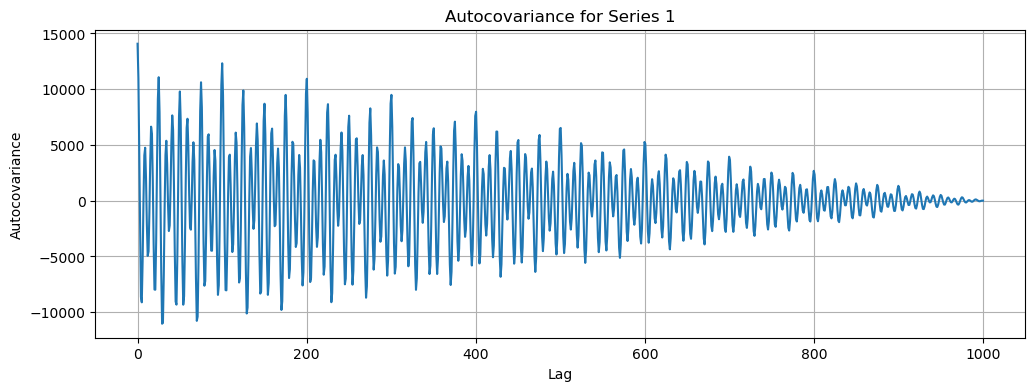

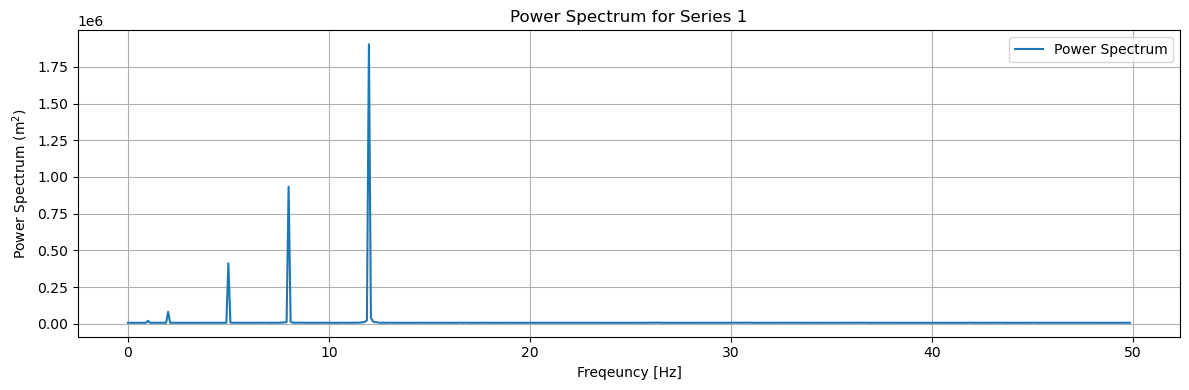

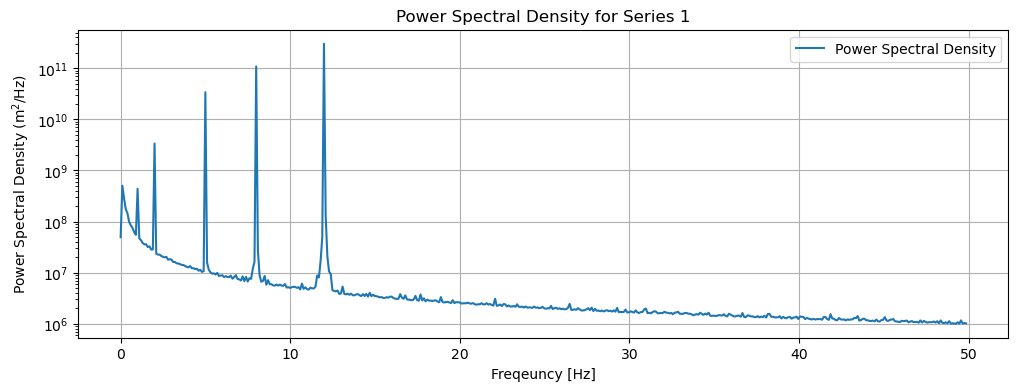

In [220]:
psd_series1, fft_freqs = SeriesTransforms(series1 - linear_trend, n_points, 0, 1000, 'Autocovariance for Series 1', 'Power Spectrum for Series 1', 'Power Spectral Density for Series 1')

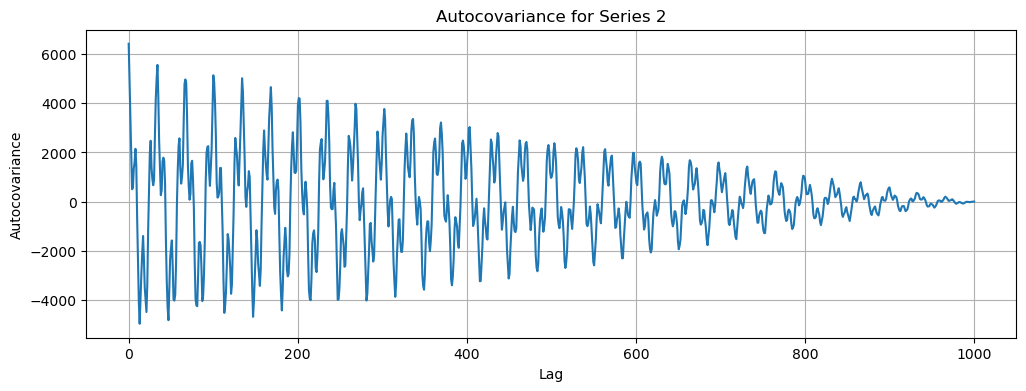

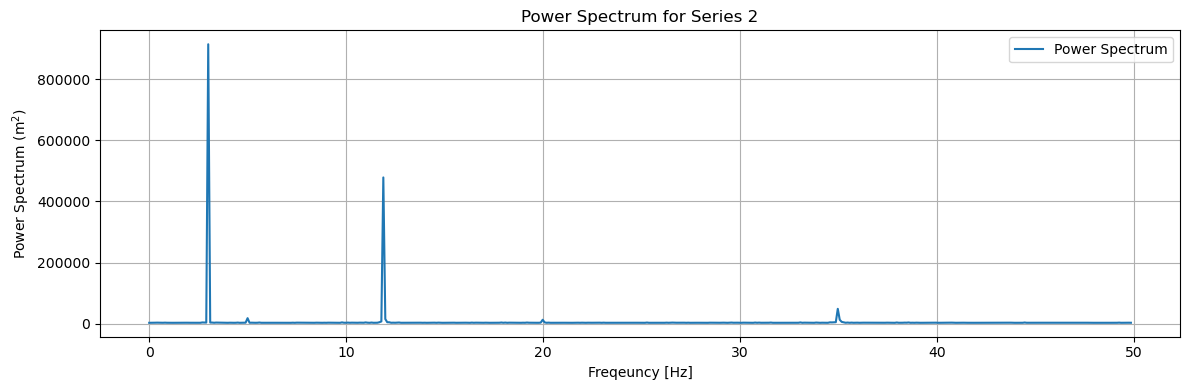

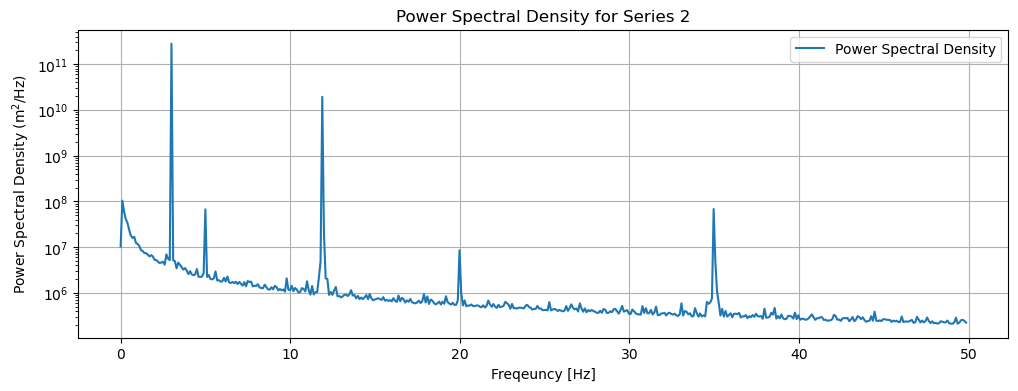

In [221]:
psd_series2, fft_freqs = SeriesTransforms(series2 - quadratic_trend, n_points, 0, 1000, 'Autocovariance for Series 2', 'Power Spectrum for Series 2', 'Power Spectral Density for Series 2')

--- 

**Computing the Cross Power Spectrum of the two Series**

---

In [248]:
def cross_covariance(series1, series2, lag):
    n = len(series1)
    cross_covar_sum = 0
    mean1 = np.mean(series1)
    mean2 = np.mean(series2)
    for t in range(n - lag):
        cross_covar_sum += (series1[t] - mean1) * (series2[t + lag] - mean2)
    return cross_covar_sum / n

# Calculate Cross-Correlation Function
def cross_correlation(series1, series2, lag):
    cov_k = cross_covariance(series1, series2, lag)
    std1 = np.std(series1)
    std2 = np.std(series2)
    return cov_k / (std1 * std2)

def CPS(series1, series2, points, lag_i, lag_f, crosscov_title, power_spectrum_title):
    crosscov_list = []
    lag = np.linspace(lag_i, lag_f, (lag_f - lag_i))
    for i in lag:
        crosscov_series = cross_covariance(series1, series2, int(i))
        crosscov_list.append(crosscov_series)
    power_spectrum, fft_freqs, sampling_frequency = FourierTransform(crosscov_list)
    power_spectrum = np.real(power_spectrum)
     
   # Select positive frequencies
    positive_freqs_mask = fft_freqs >= 0
    fft_freqs = fft_freqs[positive_freqs_mask]
    power_spectrum = power_spectrum[positive_freqs_mask]
    
    # Create a figure with two rows and one column of subplots
    plt.figure(figsize=(12, 4))
    plt.title(crosscov_title)
    plt.plot(lag, crosscov_list, label='Cross-covariance')
    plt.xlabel('Lag')
    plt.ylabel('Cross-covariance')
    plt.grid(True)
    plt.legend
    plt.show()
    
    # plot for Synthetic Power Spectrum
    plt.figure(figsize=(12, 4))
    plt.title(power_spectrum_title)
    plt.plot(fft_freqs, power_spectrum, label='Power Spectrum')
    plt.xlabel('Freqeuncy [Hz]')
    plt.ylabel('Power Spectrum (m $x$ s)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return

def CPSD(series1, series2, points, lag_i, lag_f, crosscorr_title, psd_title):
    crosscorr_list = []
    lag = np.linspace(lag_i, lag_f, (lag_f - lag_i))
    for i in lag:
        crosscorr_series = cross_correlation(series1, series2, int(i))
        crosscorr_list.append(crosscorr_series)
    psd, fft_freqs, sampling_frequency = FourierTransform(crosscorr_list)
    psd = np.real(psd)
     
   # Select positive frequencies
    positive_freqs_mask = fft_freqs >= 0
    fft_freqs = fft_freqs[positive_freqs_mask]
    psd = psd[positive_freqs_mask]
    
    # Create a figure with two rows and one column of subplots
    plt.figure(figsize=(12, 4))
    plt.title(crosscorr_title)
    plt.plot(lag, crosscorr_list, label='Cross-correlation')
    plt.xlabel('Lag')
    plt.ylabel('Cross-correlation')
    plt.grid(True)
    plt.legend
    plt.show()
    
    # plot for Synthetic Power Spectrum
    plt.figure(figsize=(12, 4))
    plt.title(psd_title)
    plt.semilogy(fft_freqs, np.abs(psd)**2, label='Power Spectral Density Log Scale')
    plt.xlabel('Freqeuncy [Hz]')
    plt.ylabel('Power Spectral Density [unitless]')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # plot for Synthetic Power Spectrum
    plt.figure(figsize=(12, 4))
    plt.title(psd_title)
    plt.plot(fft_freqs, np.abs(psd)**2, label='Power Spectral Density')
    plt.xlabel('Freqeuncy [Hz]')
    plt.ylabel('Power Spectral Density [unitless]')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return psd

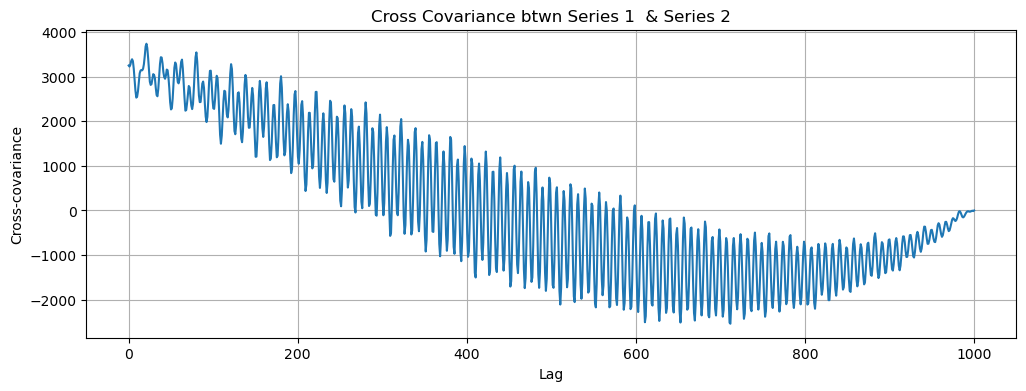

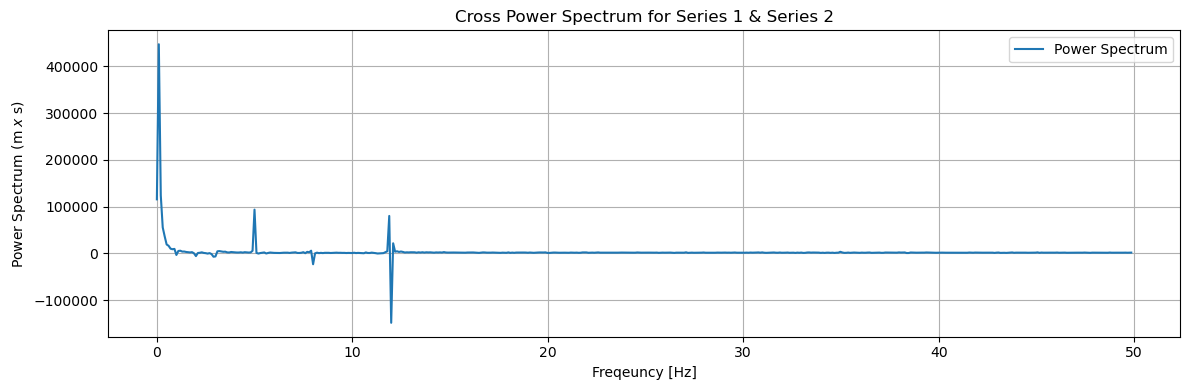

In [249]:
CPS(series1 , series2, n_points, 0, 1000, 'Cross Covariance btwn Series 1  & Series 2', 'Cross Power Spectrum for Series 1 & Series 2')

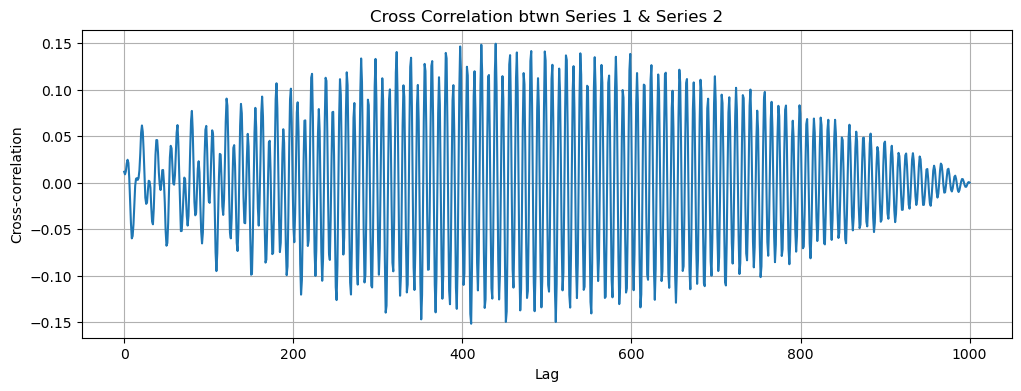

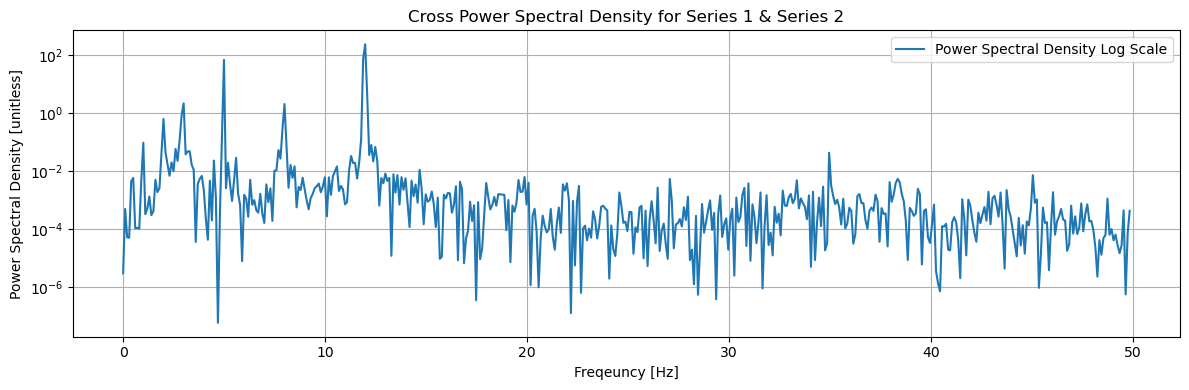

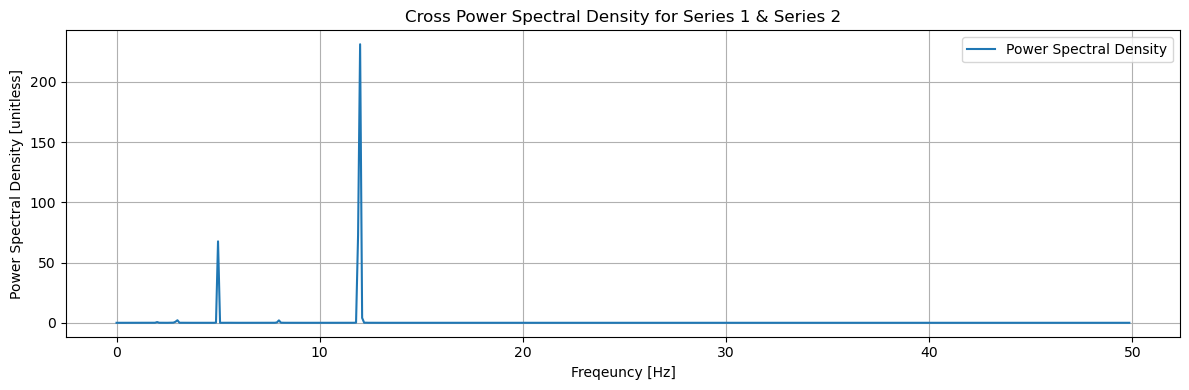

In [250]:
psd_12 = CPSD(series1 - linear_trend, series2 - quadratic_trend, n_points, 0, 1000, 'Cross Correlation btwn Series 1 & Series 2','Cross Power Spectral Density for Series 1 & Series 2')

---

**Computing the Square Coherency**

---

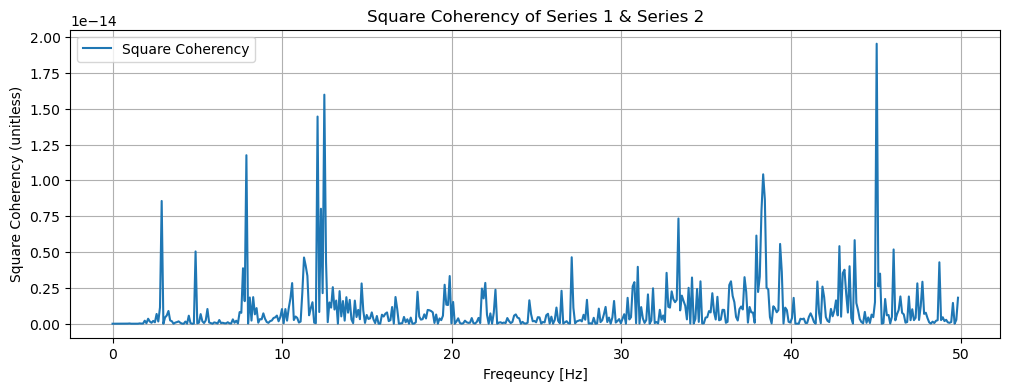

In [251]:
psd_12_sq = np.abs(psd_12)**2
psd_series1_series2 = psd_series1 * psd_series2
sq_coherency = psd_12_sq/psd_series1_series2

plt.figure(figsize=(12,4))
plt.title('Square Coherency of Series 1 & Series 2')
plt.plot(fft_freqs, sq_coherency, label='Square Coherency')
plt.xlabel('Freqeuncy [Hz]')
plt.ylabel('Square Coherency (unitless)')
plt.grid(True)
plt.legend()
plt.show()

---

**Computing the Complex Coherency**

---

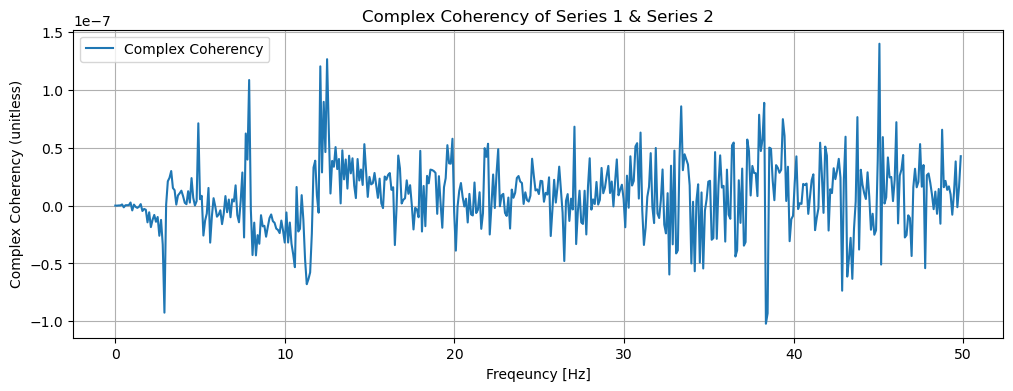

In [252]:
psd_series1_series2_root = np.sqrt(psd_series1*psd_series2)
cmplx_coherency = psd_12/psd_series1_series2_root

plt.figure(figsize=(12,4))
plt.title('Complex Coherency of Series 1 & Series 2')
plt.plot(fft_freqs, cmplx_coherency, label='Complex Coherency')
plt.xlabel('Freqeuncy [Hz]')
plt.ylabel('Complex Coherency (unitless)')
plt.grid(True)
plt.legend()
plt.show()